In [1]:
from arcgis.gis import GIS

<img src="./img/TitleSlide_4_3.png" width=100%>

# Agenda

- Introduction
- What is the ArcGIS API for Python?
- Getting Started with GIS
- Front End Configuration
    + Demo: Front Configuration
- ArcGIS Server
    + Connecting to Stand Alone Server
    + Server Logging
- Questions

<img src="./img/WhatIsAPI.png" width=100%>

<center><img src="./img/APIOverview.jpg" width=90%></center>

# The GIS Object

- Window into the Web GIS World
- Access point for using, consuming and managing content
- Supports multiple login options:
    + Built-In
    + LDAP
    + PKI
    + WinAuth
    + NTLM/Kerberos
    + Oauth
    + Anonymous

In [15]:
gis = GIS()

In [16]:
import getpass

In [17]:
gis = GIS(username=getpass.getpass(), password=getpass.getpass())

········
········


<User username:AndrewSolutions>
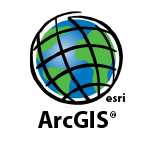

In [18]:
gis.users.me

# Configuring Portal 

- Administrators can fully customize the user experience

## Demo: Customizing the Frontend

<center><img src='./img/PortalBegin.JPG' /></center>

## Demo: Customizing the Frontend

- Accessing the UI

In [34]:
from arcgis.gis import GIS
gis = GIS(url="http://achap.esri.com/portal", 
          username="admin", verify_cert=False)

Enter password: ········


In [3]:
ux = gis.admin.ux

### UX Methods

    + default_basemap
    + default_extent
    + description
    + enable/disable comments
    + feature content
    + get/set background
    + get/set banner
    + get/set logo
    + get/set name

# Setting the Featured Content Group

In [37]:
ux.featured_content = {'count' : 12, 'group' : '2ef66730a418498990f78ace2b63c87c'}
ux.featured_content

{'count': 12, 'group': '2ef66730a418498990f78ace2b63c87c'}

<center><img src="./img/PortalStep1.JPG" /></center>

# Turn off Description Visibility

In [38]:
ux.description_visibility = False

<center><img src="./img/PortalStep2.JPG" /></center>

# Set the Banner

<center><img src='./img/banner.jpg' /></center>

In [39]:
ux.set_banner('./img/banner.jpg')

True

# Define Header Color 

In [40]:
gis.update_properties({"description": 
                       """<br /><div class="WordSection1">  </div><style>.siteHeader {   background: #ff8080 !important; } &amp;amp;lt;!--  /* Font Definitions */  @font-face  {font-family:&amp;amp;quot;Cambria Math&amp;amp;quot;;  panose-1:2 4 5 3 5 4 6 3 2 4;} @font-face  {font-family:Calibri;  panose-1:2 15 5 2 2 2 4 3 2 4;} @font-face  {font-family:&amp;amp;quot;Segoe UI&amp;amp;quot;;  panose-1:2 11 5 2 4 2 4 2 2 3;}  /* Style Definitions */  p.MsoNormal, li.MsoNormal, div.MsoNormal  {margin-top:0in;  margin-right:0in;  margin-bottom:8.0pt;  margin-left:0in;  line-height:107%;  font-size:11.0pt;  font-family:&amp;amp;quot;Calibri&amp;amp;quot;,sans-serif;} .MsoChpDefault  {font-family:&amp;amp;quot;Calibri&amp;amp;quot;,sans-serif;} .MsoPapDefault  {margin-bottom:8.0pt;  line-height:107%;}  /* Page Definitions */  @page WordSection1  {size:8.5in 11.0in;  margin:1.0in 1.0in 1.0in 1.0in;} div.WordSection1  {page:WordSection1;} --&amp;amp;gt; </style>"""})

True

In [41]:
color = "#ff8080"
gis.update_properties({"portalProperties":{"links":{"contactUs":{"url":"mailto:awesome@esri.com","visible":True}},
                                           "sharedTheme":{"header":{"background":color,"text":None},
                                                          "body":{"background":color,"text":None,"link":None},
                                                          "button":{"background": None,"text": None},
                                                          "logo":{"small": None}},"showSocialMediaLinks": True}})

True

# Add Contact Us

In [42]:
gis.update_properties({"portalProperties":{"links":{"contactUs":{"url":"mailto:awesome@esri.com","visible":True}}}})


True

# Set a New Background

In [43]:
ux.set_background('./img/background.png')

True

<center><img src="./img/PortalStep3.JPG" /></center>

# Fixing the Mess We've Made

In [44]:
desc = """<style> lt;!--  /* Font Definitions */  @font-face  {font-family:&amp;amp;amp;quot;Cambria Math&amp;amp;amp;quot;;  panose-1:2 4 5 3 5 4 6 3 2 4;} @font-face  {font-family:Calibri;  panose-1:2 15 5 2 2 2 4 3 2 4;} @font-face  {font-family:&amp;amp;amp;quot;Segoe UI&amp;amp;amp;quot;;  panose-1:2 11 5 2 4 2 4 2 2 3;}  /* Style Definitions */  p.MsoNormal, li.MsoNormal, div.MsoNormal  {margin-top:0in;  margin-right:0in;  margin-bottom:8.0pt;  margin-left:0in;  line-height:107%;  font-size:11.0pt;  font-family:&amp;amp;amp;quot;Calibri&amp;amp;amp;quot;,sans-serif;} .MsoChpDefault  {font-family:&amp;amp;amp;quot;Calibri&amp;amp;amp;quot;,sans-serif;} .MsoPapDefault  {margin-bottom:8.0pt;  line-height:107%;}  /* Page Definitions */  @page WordSection1  {size:8.5in 11.0in;  margin:1.0in 1.0in 1.0in 1.0in;} div.WordSection1  {page:WordSection1;} --&amp;amp;amp;gt; </style>      <div class="WordSection1">  <p class="MsoNormal" style="margin-top:2.0pt;margin-right:0in;margin-bottom:2.0pt; margin-left:0in;line-height:normal;text-autospace:none"><br /></p>  </div>"""

In [45]:
ux.set_background(None)
ux.set_banner(None)
ux.set_logo(None)
ux.featured_content = None
ux.description_visibility = True
gis.update_properties({"portalProperties":{"links":{"contactUs":{"url":"mailto:awesome@esri.com","visible":False}},
                                           "sharedTheme":{"header":{"background":None,"text":None},
                                                          "body":{"background":None,"text":None,"link":None},
                                                          "button":{"background": None,"text": None},
                                                          "logo":{"small": None}},"showSocialMediaLinks": True}})
gis.update_properties({"description": desc})

True

# Connecting to a standalone (unfederated) ArcGIS Server

In [1]:
from arcgis.gis.server import Server

server_base_url = "http://ec2-34-213-249-91.us-west-2.compute.amazonaws.com"
server = Server(url="{}:6080/arcgis/admin".format(server_base_url),
                tokenurl="{}:6080/arcgis/rest/generateToken".format(server_base_url),
                username="admin",
                password="<insert_password_here>")
server

The GIS uses Integrated Windows Authentication which is currently only supported on the Windows platform


<Server at http://ec2-34-213-249-91.us-west-2.compute.amazonaws.com:6080/arcgis/admin>

# Display folder contents

In [5]:
def _get_readable_item_str(url, folder):
    """Parse the service item URL to a readable representation 
    of the item and it's server type"""
    item_part_of_url = url.split("{}/".format(folder))[1]
    return item_part_of_url.replace("/", " (") + ")" #Add (type) at end

def _print_content_dir(server):
    """Prints out the content in all server dir (minus root dir)"""
    for folder in server.content.folders:
        print("{}/".format(folder))
        for item in server.content.list(folder):
            print("    {}".format(
                _get_readable_item_str(item.url, folder)))

_print_content_dir(server)

ebola/
    ebola_outbreaks (MapServer)
Health_Data/
    Breast_Cancer_Data (MapServer)
    Flu_Cases_2014 (MapServer)
System/
    CachingControllers (GPServer)
    CachingToolsEx (GPServer)
    CachingTools (GPServer)
    PublishingToolsEx (GPServer)
    PublishingTools (GPServer)
    ReportingTools (GPServer)
    SceneCachingControllers (GPServer)
    SceneCachingTools (GPServer)
    SyncToolsEx (GPServer)
    SyncTools (GPServer)
    UtilityNetworkTools (GPServer)
Utilities/
    Raster)


In [6]:
breast_cancer_item = server.content.list("Health_Data")[0]
breast_cancer_item.item_info

{'accessInformation': 'Esri, National Cancer Institute, National Vital Statistics System public use data file',
 'catalogPath': '',
 'culture': 'en-US',
 'description': "Age-adjusted breast cancer mortality rates are for the United States by county and reflect an average of the years 2006-2010. Data are from the National Cancer Institute's State Cancer Profiles web site http://statecancerprofiles.cancer.gov/). Data were downloaded from the interactive maps in at this web site: http://statecancerprofiles.cancer.gov/map/map.noimage.php. The data are for the U.S. by county for Breast Cancer Rates. The data are for White (including Hispanic) and Black (including Hispanic) Females of all ages. The rates are five-year averages of the number of deaths per 100,000 women, and the 100,000 women are the women in the resident population, or the population being described (e.g., black women of all ages for the black female mortality rate or white women of all ages for the white female mortality rat

# Display layer information

In [7]:
for layer in breast_cancer_item.layers:
    print("%-35s%-35s" % (layer.properties["name"], layer.url.split("Health_Data")[1]))

Breast_Cancer_Data                 /Breast_Cancer_Data/MapServer/0    
Boundaries                         /Breast_Cancer_Data/MapServer/1    
USA                                /Breast_Cancer_Data/MapServer/2    
States                             /Breast_Cancer_Data/MapServer/3    
Counties                           /Breast_Cancer_Data/MapServer/4    
White Female Mortality Rate        /Breast_Cancer_Data/MapServer/5    
Black Female Mortality Rate        /Breast_Cancer_Data/MapServer/6    
Suppressed Data                    /Breast_Cancer_Data/MapServer/7    


In [8]:
suppressed_data_layer = breast_cancer_item.layers[7]
print(suppressed_data_layer.properties["description"])

From:  http://statecancerprofiles.cancer.gov/suppressed.html

When the numbers of cases (or deaths) used to compute the incidence (and death) rates (and trends) are small, those rates (and trends) tend to have poor reliability. Therefore, to discourage misinterpretation and misuse of counts, rates, and trends that are unstable because of the small number of cases or deaths, these statistics are not shown in tables and figures if the counts are less than 16 for the time period. A count of less than approximately 16 in a numerator results in a standard error of the rate that is approximately 25% or more as large as the rate itself. Equivalently, a count of less than approximately 16 results in the width of the 95% confidence interval around the rate being at least as large as the rate itself. These relationships were derived under the assumption of a Poisson process and with the standard population age distribution close to the observed population age distribution. 

Another important re

# Starting and stopping services

In [2]:
sample_service = server.services.list()[0]
print("{}\n-----------------\n{}".format(
    sample_service.properties["serviceName"],
    sample_service.properties["description"]))

SampleWorldCities
-----------------
The SampleWorldCities service is provided so you can quickly and easily preview the functionality of the GIS server. Click the thumbnail image to open in a web application. This sample service is optional and can be deleted.


In [3]:
def print_service_status(service):
    print("Current status of service '{}': {}".format(
        sample_service.properties["serviceName"],
        sample_service.status["realTimeState"]))

print_service_status(sample_service)

Current status of service 'SampleWorldCities': STARTED


In [4]:
outcome = sample_service.stop()
print("Stopping service '{}' {}".format(sample_service.properties["serviceName"],
                                        "Succeeded" if outcome else "Failed"))
print_service_status(sample_service)

Stopping service 'SampleWorldCities' Succeeded
Current status of service 'SampleWorldCities': STOPPED


In [6]:
outcome = sample_service.start()
print("Starting service '{}' {}".format(sample_service.properties["serviceName"],
                                        "Succeeded" if outcome else "Failed"))
print_service_status(sample_service)

Starting service 'SampleWorldCities' Succeeded
Current status of service 'SampleWorldCities': STARTED


# Log analysis

In [7]:
import datetime
from arcgis.gis import GIS
g = GIS("https://python.playground.esri.com/portal", "arcgis_python", "<insert_password_here>")
server = g.admin.servers.list()[0]
messages = server.logs.query(datetime.datetime.now().isoformat(),
                             level="SEVERE")["logMessages"]
messages[:2]

[{'code': 20010,
  'elapsed': '',
  'machine': '10.0.0.250',
  'message': 'Error executing tool. CreateBuffers Job ID: jded85941342647cf9aa6550897d34af1 : {"messageCode": "AO_100012", "message": "CreateBuffers failed."}\nFailed to execute (CreateBuffers).',
  'methodName': 'GPServerSync.CheckMessages',
  'process': '31221',
  'source': 'System/SpatialAnalysisTools.GPServer',
  'thread': '81',
  'time': 1519888394800,
  'type': 'SEVERE',
  'user': 'arcgis_python'},
 {'code': 500000,
  'elapsed': '',
  'machine': '10.0.0.250',
  'message': 'Table not registered [db_60vw8.hsu_a635a.Fire_Buffers_2018_03_01_16_12_53_Fire_Buffers_2018]',
  'methodName': '',
  'process': '31221',
  'source': 'System/SpatialAnalysisTools.GPServer',
  'thread': '81',
  'time': 1519888394291,
  'type': 'SEVERE',
  'user': 'arcgis_python'}]

In [11]:
grouped_messages[23836]

[{'code': 23836,
  'elapsed': '',
  'machine': '10.0.0.250',
  'message': 'The maximum number of records allowed has been exceeded.',
  'methodName': 'Generate',
  'process': '27046',
  'source': 'System/PublishingTools.GPServer',
  'thread': '75',
  'time': 1516300916506,
  'type': 'SEVERE',
  'user': 'arcgis_python'},
 {'code': 23836,
  'elapsed': '',
  'machine': '10.0.0.250',
  'message': "Failed to connect to the server.: ERROR: In-server connection failed. Server is federated but server environment doesn't have a referer.",
  'methodName': 'pubSD.execute',
  'process': '31406',
  'source': 'System/PublishingTools.GPServer',
  'thread': '90',
  'time': 1513116850188,
  'type': 'SEVERE',
  'user': '0123456789ABCDEF::arcgis_python'}]

In [10]:
from itertools import groupby

#Group messages by their error code
grouped_messages = {}
for key, group in groupby(messages, lambda x: x["code"]):
    if key in grouped_messages:
        grouped_messages[key].append(list(group)[0])
    else:
        grouped_messages[key] = [list(group)[0]]

#Display the frequency of displayed messages
for key in grouped_messages:
    print("Error code {} reported {} times".format(key, len(grouped_messages[key])))

Error code 20010 reported 82 times
Error code 500000 reported 78 times
Error code 9000 reported 7 times
Error code 6602 reported 12 times
Error code 9003 reported 4 times
Error code 9016 reported 4 times
Error code 23836 reported 2 times
Error code 17103 reported 1 times
Error code 50000 reported 2 times


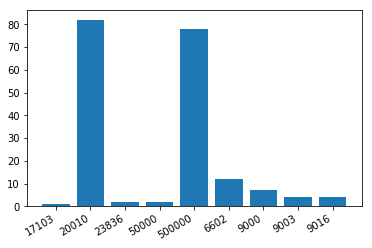

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar(list(str(x) for x in grouped_messages.keys()),
        list(len(x) for x in grouped_messages.values()))
fig.autofmt_xdate() #format x axis
plt.show()

# Working without notebooks

<img src='./img/IDE_example.png'/>

<img src='./img/standalone_script_demo.gif'/>

<img src='./img/jenkins_overview.gif'/>

# Questions?

<img src='./img/survey.JPG'/>

<img src='./img/Sessions.png'/>

### Additional Reference

Source: https://enterprise.arcgis.com/en/server/10.3/administer/linux/log-codes-overview.htm

Log code number ranges are associated with certain types of messages.

 * Codes below 10,000 are logged by the core framework of ArcGIS Server.
 * Codes between 10,000 and 100,000 pertain to services.
 * Codes above 100,000 are core ArcObjects component-related messages that may also be used in ArcGIS Engine or ArcGIS for Desktop.

Log code range | Message content
---------------|----------------
0-9999 | Core ArcGIS Server framework
10000–10999 | Map services
11000–11999 | Mobile data services
12000–12999 |KML services
13000–13999 | Network Analysis services
14000–14999 | WFS services created from map services
15000–15999 | WCS services created from map services
16000–16999 |WMS services created from map services
17000–19999 | Feature services
20000–20999 | Geoprocessing services
21000–21999 | Synchronous geoprocessing services
30000–30999 | Globe services
60000–60999 | Geometry services
70000–70999 | Geocode services
... | ...
100000–100999 | System
101000–101999 | Geometry
102000–102999 |Geodatabase
103000–103999 | Carto
104000–104999 | Display
105000–105999 | Output
106000–106999 | Geoprocessing
107000–107999 | Globe
108000–108999 | 3D
109000–109999 | Network Analyst
110000–110999 | ArcGIS Data Store
...|...

<img src='./img/lastslide.JPG'/>